In [2]:
import pandas as pd
import os

In [3]:
import pandas as pd
import os

# Directory where your files are located
directory = 'Sales_Data\\Sales_Data_2020'

# List all files in the directory
files = [file for file in os.listdir(directory)]

# Initialize an empty DataFrame to store all data
all_months_data = pd.DataFrame()

# Loop through files and concatenate data
for file in files:
    # Get the full file path by joining the directory and file name
    file_path = os.path.join(directory, file)
    
    # Read the CSV file and concatenate data
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])

# Save the concatenated data to a new CSV file
all_months_data.to_csv("all_data2.csv", index=False)


In [4]:
all_data2020 = pd.read_csv("all_data2.csv")
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,165872,USB-C Charging Cable,1,11.95,04/17/20 12:47,"736 Lakeview St, New York City, NY 10001"
1,165873,Wired Headphones,1,11.99,04/30/20 10:50,"719 Spruce St, New York City, NY 10001"
2,165874,AA Batteries (4-pack),1,3.84,04/15/20 19:04,"908 Church St, Seattle, WA 98101"
3,165875,20in Monitor,1,109.99,04/15/20 15:41,"343 Wilson St, New York City, NY 10001"
4,165876,Lightning Charging Cable,1,14.95,04/25/20 17:48,"841 5th St, Los Angeles, CA 90001"


## AUGUMENT DATA WITH ADDITIONAL COLUMNS

### Clean up the data: clearing rows with NaN in the various columns
 since it will not allows us to manipulate those values

### Drop rows with NaN

In [5]:
nan_df = all_data2020[all_data2020.isna().any(axis=1)]
nan_df.head()
all_data2020 = all_data2020.dropna(how = 'all')
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,165872,USB-C Charging Cable,1,11.95,04/17/20 12:47,"736 Lakeview St, New York City, NY 10001"
1,165873,Wired Headphones,1,11.99,04/30/20 10:50,"719 Spruce St, New York City, NY 10001"
2,165874,AA Batteries (4-pack),1,3.84,04/15/20 19:04,"908 Church St, Seattle, WA 98101"
3,165875,20in Monitor,1,109.99,04/15/20 15:41,"343 Wilson St, New York City, NY 10001"
4,165876,Lightning Charging Cable,1,14.95,04/25/20 17:48,"841 5th St, Los Angeles, CA 90001"


### Find 'Or' and Delete 

In [6]:
all_data2020 = all_data2020[all_data2020['Order Date'].str[0:2] != 'Or']
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,165872,USB-C Charging Cable,1,11.95,04/17/20 12:47,"736 Lakeview St, New York City, NY 10001"
1,165873,Wired Headphones,1,11.99,04/30/20 10:50,"719 Spruce St, New York City, NY 10001"
2,165874,AA Batteries (4-pack),1,3.84,04/15/20 19:04,"908 Church St, Seattle, WA 98101"
3,165875,20in Monitor,1,109.99,04/15/20 15:41,"343 Wilson St, New York City, NY 10001"
4,165876,Lightning Charging Cable,1,14.95,04/25/20 17:48,"841 5th St, Los Angeles, CA 90001"


### Convert Columns to the Correct Data type

In [7]:
try:
    all_data2020['Quantity Ordered'] = pd.to_numeric(all_data2020['Quantity Ordered'])
    all_data2020['Price Each'] = pd.to_numeric(all_data2020['Price Each'])
except ValueError as e:
    print(f"Error converting columns: {e}")

### Handling missing values

In [8]:
all_data2020['Quantity Ordered'].fillna(0, inplace=True)
all_data2020['Price Each'].fillna(0, inplace=True)

### Task 1: Add Month Column

In [9]:
all_data2020['Month'] = all_data2020['Order Date'].str[0:2]
all_data2020['Month'] = all_data2020['Month'].astype('int32')
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,165872,USB-C Charging Cable,1,11.95,04/17/20 12:47,"736 Lakeview St, New York City, NY 10001",4
1,165873,Wired Headphones,1,11.99,04/30/20 10:50,"719 Spruce St, New York City, NY 10001",4
2,165874,AA Batteries (4-pack),1,3.84,04/15/20 19:04,"908 Church St, Seattle, WA 98101",4
3,165875,20in Monitor,1,109.99,04/15/20 15:41,"343 Wilson St, New York City, NY 10001",4
4,165876,Lightning Charging Cable,1,14.95,04/25/20 17:48,"841 5th St, Los Angeles, CA 90001",4


### Task 2: Add a Sales Column

In [10]:
all_data2020['Sales'] = all_data2020['Quantity Ordered'] * all_data2020['Price Each']
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,165872,USB-C Charging Cable,1,11.95,04/17/20 12:47,"736 Lakeview St, New York City, NY 10001",4,11.95
1,165873,Wired Headphones,1,11.99,04/30/20 10:50,"719 Spruce St, New York City, NY 10001",4,11.99
2,165874,AA Batteries (4-pack),1,3.84,04/15/20 19:04,"908 Church St, Seattle, WA 98101",4,3.84
3,165875,20in Monitor,1,109.99,04/15/20 15:41,"343 Wilson St, New York City, NY 10001",4,109.99
4,165876,Lightning Charging Cable,1,14.95,04/25/20 17:48,"841 5th St, Los Angeles, CA 90001",4,14.95


### Task 3: Add a City Column

In [11]:
# lets use .apply() method
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data2020['City'] = all_data2020['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ get_state(x))
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,165872,USB-C Charging Cable,1,11.95,04/17/20 12:47,"736 Lakeview St, New York City, NY 10001",4,11.95,New York City NY
1,165873,Wired Headphones,1,11.99,04/30/20 10:50,"719 Spruce St, New York City, NY 10001",4,11.99,New York City NY
2,165874,AA Batteries (4-pack),1,3.84,04/15/20 19:04,"908 Church St, Seattle, WA 98101",4,3.84,Seattle WA
3,165875,20in Monitor,1,109.99,04/15/20 15:41,"343 Wilson St, New York City, NY 10001",4,109.99,New York City NY
4,165876,Lightning Charging Cable,1,14.95,04/25/20 17:48,"841 5th St, Los Angeles, CA 90001",4,14.95,Los Angeles CA


### Question 1: What was the best month for sales? How much was earned that month?

In [12]:
results = all_data2020.groupby('Month').sum()

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_12648\2219010031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data2020.groupby('Month').sum()


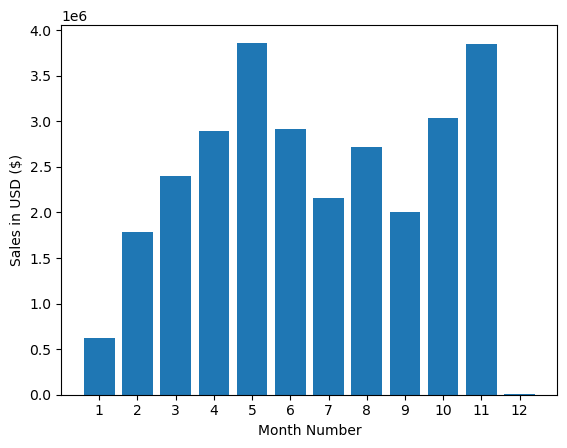

In [13]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#From the Chart it is seen that Month 5 and 11 had the highest number of sales.

### Question 2: What City had the highest number of Sales?

In [14]:
results = all_data2020.groupby('City').sum()
results

# From the table it is seen that San Francisco CA had the highest number of sales.

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_12648\2582260404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data2020.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,13508,2238061.64,80112,2250313.84
Austin TX,9129,1505181.71,54302,1513314.89
Boston MA,18247,3009375.88,107364,3027904.80
Dallas TX,13488,2207710.47,79505,2221966.78
Los Angeles CA,27378,4543151.85,161788,4568599.79
New York City NY,22422,3766640.22,132081,3790374.33
Portland ME,2296,385111.71,13458,386573.69
Portland OR,8968,1495560.21,53134,1503151.80
San Francisco CA,41153,6723130.79,241479,6764873.15


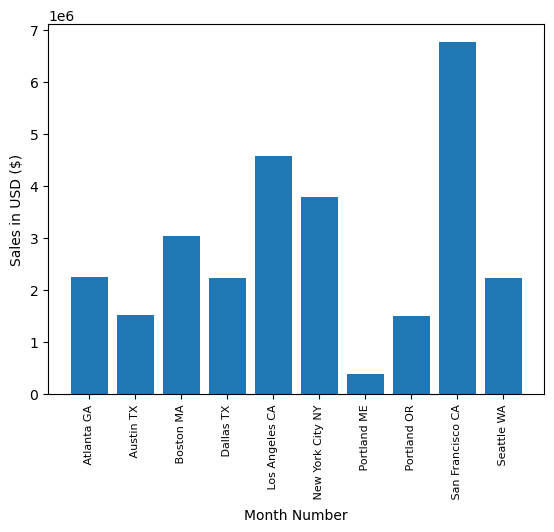

In [15]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data2020.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### Question 3: What time should we Display advertisements to maximize likelihood of customer's buying product?

In [16]:
all_data2020['Order Date'] = pd.to_datetime(all_data2020['Order Date'])

In [17]:
all_data2020['Hour'] = all_data2020['Order Date'].dt.hour
all_data2020['Minute'] = all_data2020['Order Date'].dt.minute
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,165872,USB-C Charging Cable,1,11.95,2020-04-17 12:47:00,"736 Lakeview St, New York City, NY 10001",4,11.95,New York City NY,12,47
1,165873,Wired Headphones,1,11.99,2020-04-30 10:50:00,"719 Spruce St, New York City, NY 10001",4,11.99,New York City NY,10,50
2,165874,AA Batteries (4-pack),1,3.84,2020-04-15 19:04:00,"908 Church St, Seattle, WA 98101",4,3.84,Seattle WA,19,4
3,165875,20in Monitor,1,109.99,2020-04-15 15:41:00,"343 Wilson St, New York City, NY 10001",4,109.99,New York City NY,15,41
4,165876,Lightning Charging Cable,1,14.95,2020-04-25 17:48:00,"841 5th St, Los Angeles, CA 90001",4,14.95,Los Angeles CA,17,48


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3208,3208,3208,3208,3208,3208,3208,3208,3208,3208
1,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
2,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079
3,624,624,624,624,624,624,624,624,624,624
4,629,629,629,629,629,629,629,629,629,629
5,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026
6,1898,1898,1898,1898,1898,1898,1898,1898,1898,1898
7,3344,3344,3344,3344,3344,3344,3344,3344,3344,3344
8,5133,5133,5133,5133,5133,5133,5133,5133,5133,5133


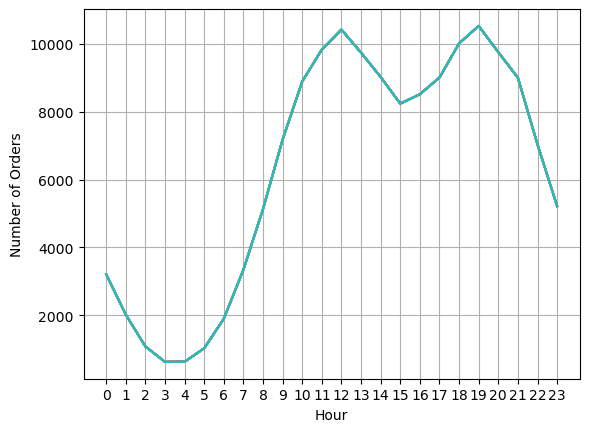

In [18]:
hours = [hour for hour, df in all_data2020.groupby('Hour')]

plt.plot(hours, all_data2020.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
all_data2020.groupby(['Hour']).count()


# From the chart my recommmendation is 11:00 (11am) and 19:00 (7pm)

### Question 4: What Products are sold more often?

In [19]:
df = all_data2020[all_data2020['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_12648\3619446399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
7,165879,"iPhone,Wired Headphones"
55,165925,"Lightning Charging Cable,Bose SoundSport Headp..."
99,165968,"Macbook Pro Laptop,Wired Headphones"
126,165994,"LG Dryer,Wired Headphones"
133,166000,"iPhone,Lightning Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print (key,value)

('iPhone', 'Lightning Charging Cable') 884
('Google Phone', 'USB-C Charging Cable') 764
('iPhone', 'Wired Headphones') 436
('Vareebadd Phone', 'USB-C Charging Cable') 296
('Google Phone', 'Wired Headphones') 285
('iPhone', 'Apple Airpods Headphones') 273
('Google Phone', 'Bose SoundSport Headphones') 210
('Vareebadd Phone', 'Wired Headphones') 120
('USB-C Charging Cable', 'Wired Headphones') 107
('Lightning Charging Cable', 'Wired Headphones') 89


### Question 4:  What products sold the most and why do you think it sold the most?

In [21]:
all_data2020.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,165872,USB-C Charging Cable,1,11.95,2020-04-17 12:47:00,"736 Lakeview St, New York City, NY 10001",4,11.95,New York City NY,12,47
1,165873,Wired Headphones,1,11.99,2020-04-30 10:50:00,"719 Spruce St, New York City, NY 10001",4,11.99,New York City NY,10,50
2,165874,AA Batteries (4-pack),1,3.84,2020-04-15 19:04:00,"908 Church St, Seattle, WA 98101",4,3.84,Seattle WA,19,4
3,165875,20in Monitor,1,109.99,2020-04-15 15:41:00,"343 Wilson St, New York City, NY 10001",4,109.99,New York City NY,15,41
4,165876,Lightning Charging Cable,1,14.95,2020-04-25 17:48:00,"841 5th St, Los Angeles, CA 90001",4,14.95,Los Angeles CA,17,48


C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_12648\1197821646.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


<function matplotlib.pyplot.show(close=None, block=None)>

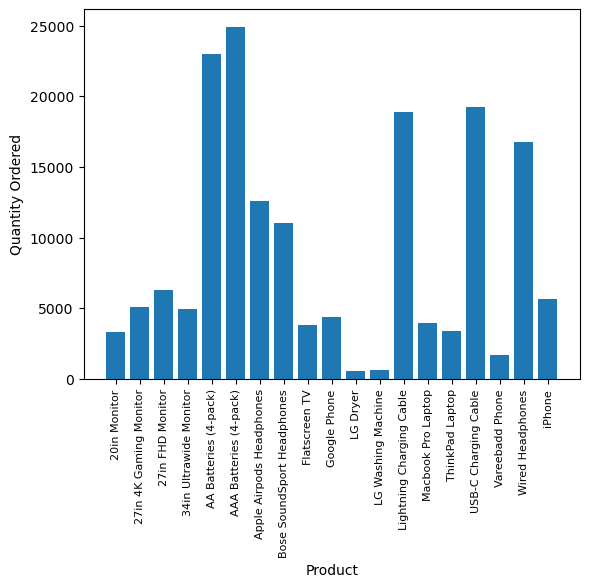

In [22]:
product_group = all_data2020.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.bar(products, quantity_ordered )
plt.xticks(products,rotation = 'vertical', size = 8)
plt.show

C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_12648\3513648533.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data2020.groupby('Product').mean()['Price Each']
C:\Users\Code Kid⚡\AppData\Local\Temp\ipykernel_12648\3513648533.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


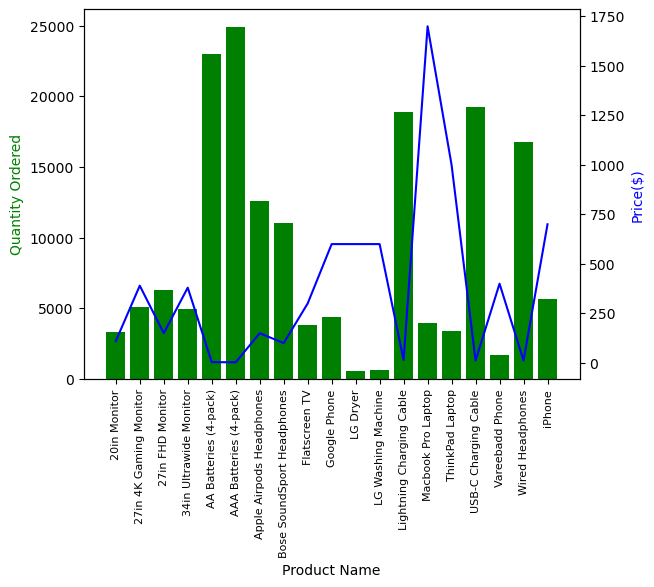

In [23]:
prices = all_data2020.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color= 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()

In [24]:
all_data2020.to_csv('all_data2.csv', index=False)